# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Exploratory Data Analysis 

In [44]:
DATAPATH = 'data/Advertising.csv'

data = pd.read_csv(DATAPATH)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


### Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.

In [45]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [46]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


In [47]:
data.shape

(200, 4)

In [48]:
data.info

<bound method DataFrame.info of         TV  radio  newspaper    sales
0    230.1   37.8       69.2  22100.0
1     44.5   39.3       45.1  10400.0
2     17.2   45.9       69.3   9300.0
3    151.5   41.3       58.5  18500.0
4    180.8   10.8       58.4  12900.0
..     ...    ...        ...      ...
195   38.2    3.7       13.8   7600.0
196   94.2    4.9        8.1   9700.0
197  177.0    9.3        6.4  12800.0
198  283.6   42.0       66.2  25500.0
199  232.1    8.6        8.7  13400.0

[200 rows x 4 columns]>

In [49]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


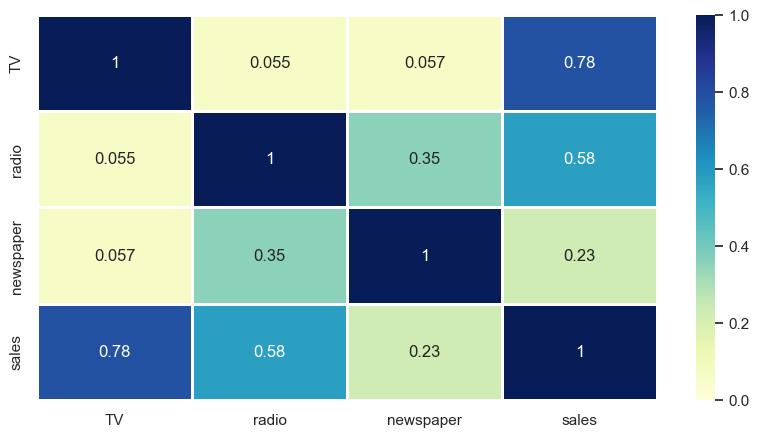

In [131]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(), vmin=0, vmax=1, linewidths=.8, cmap="YlGnBu", annot=True);

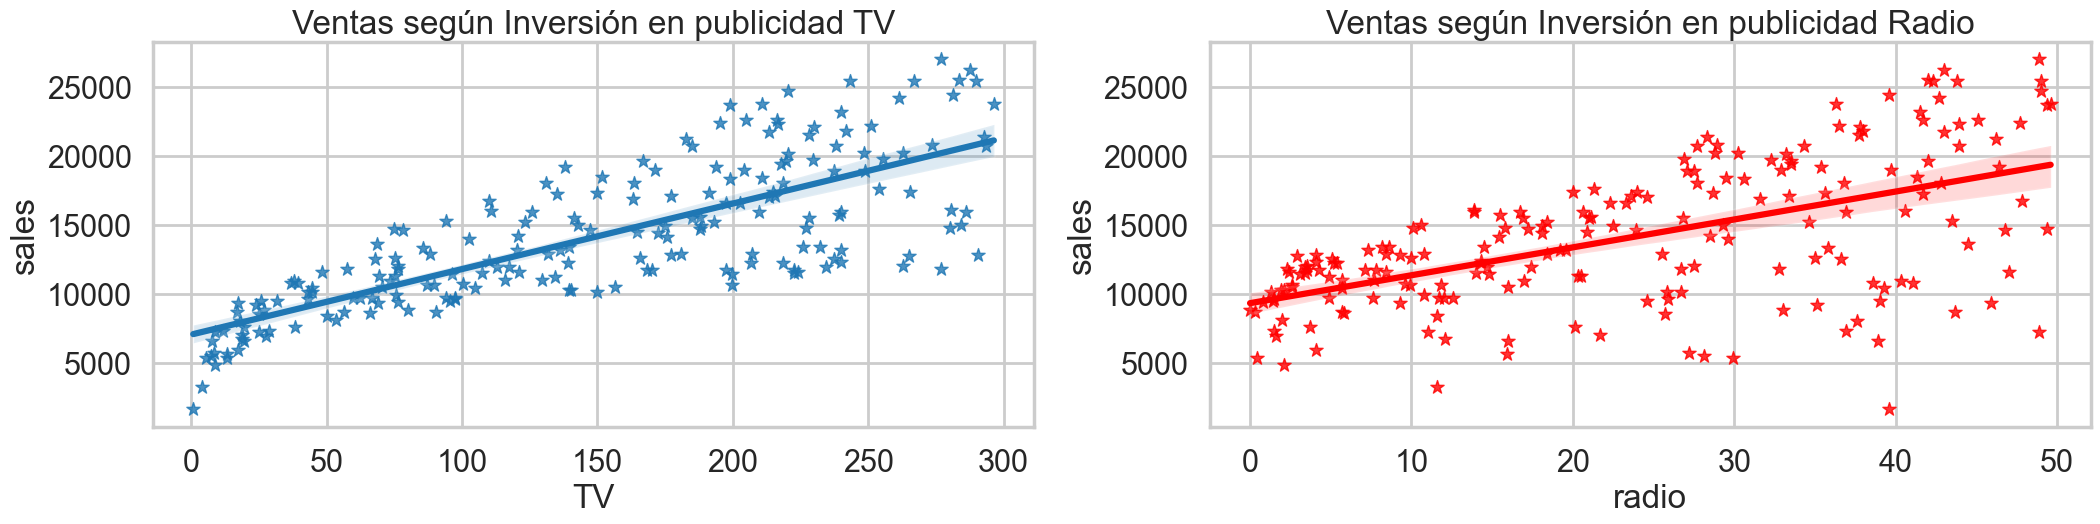

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(25, 5))


sns.regplot(x='TV', y='sales', data=data, ax=ax[0], marker='*', scatter_kws={'s':100})
sns.regplot(x='radio', y='sales', data=data, ax=ax[1], marker='*',color='red', scatter_kws={'s':100})

ax[0].set_title('Ventas según Inversión en publicidad TV')
ax[1].set_title('Ventas según Inversión en publicidad Radio');

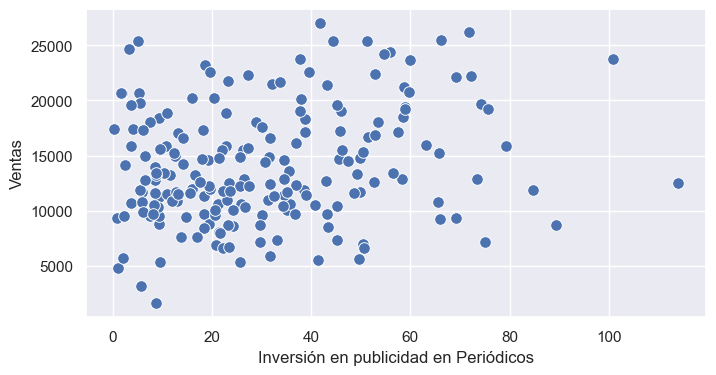

In [194]:
sns.set(rc={'figure.figsize':(8,4)})
sns.scatterplot(x='newspaper', y='sales', data=data, color='b', marker='o', s=70)
plt.xlabel('Inversión en publicidad en Periódicos')
plt.ylabel('Ventas');

### Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.

In [76]:
X = data.copy()
X.drop(columns='sales', inplace=True)

In [77]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [79]:
y = data["sales"]

In [80]:
y

0      22100.0
1      10400.0
2       9300.0
3      18500.0
4      12900.0
        ...   
195     7600.0
196     9700.0
197    12800.0
198    25500.0
199    13400.0
Name: sales, Length: 200, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 22)

print("X_TRAIN:", X_train.shape)
print("y_TRAIN:", y_train.shape)
print("X_TEST:", X_test.shape)
print("y_TEST:", y_test.shape)

X_TRAIN: (150, 3)
y_TRAIN: (150,)
X_TEST: (50, 3)
y_TEST: (50,)


In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
sc = StandardScaler()

x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

lreg.fit(x_train_sc, y_train)
lreg_y_pred = lreg.predict(x_test_sc)

In [92]:
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Error cuadrático medio en el conjunto de prueba : ", mean_squared_error) 

Error cuadrático medio en el conjunto de prueba :  2393586.4008187638


In [93]:
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = X_train.columns 
lreg_coefficient['Estimación del coeficiente'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 

     Columns  Estimación del coeficiente
0         TV                 3813.430398
1      radio                 2841.435811
2  newspaper                   -0.493719


In [94]:
print("Coeficientes:", lreg.coef_)
print("\nInterceptor:", lreg.intercept_)

Coeficientes: [ 3.81343040e+03  2.84143581e+03 -4.93719219e-01]

Interceptor: 14008.666666666668


In [95]:
df_res = pd.DataFrame(lreg.coef_, index = X_train.columns, columns = ['Coefs'])
df_res

,Coefs
TV,3813.430398
radio,2841.435811
newspaper,-0.493719


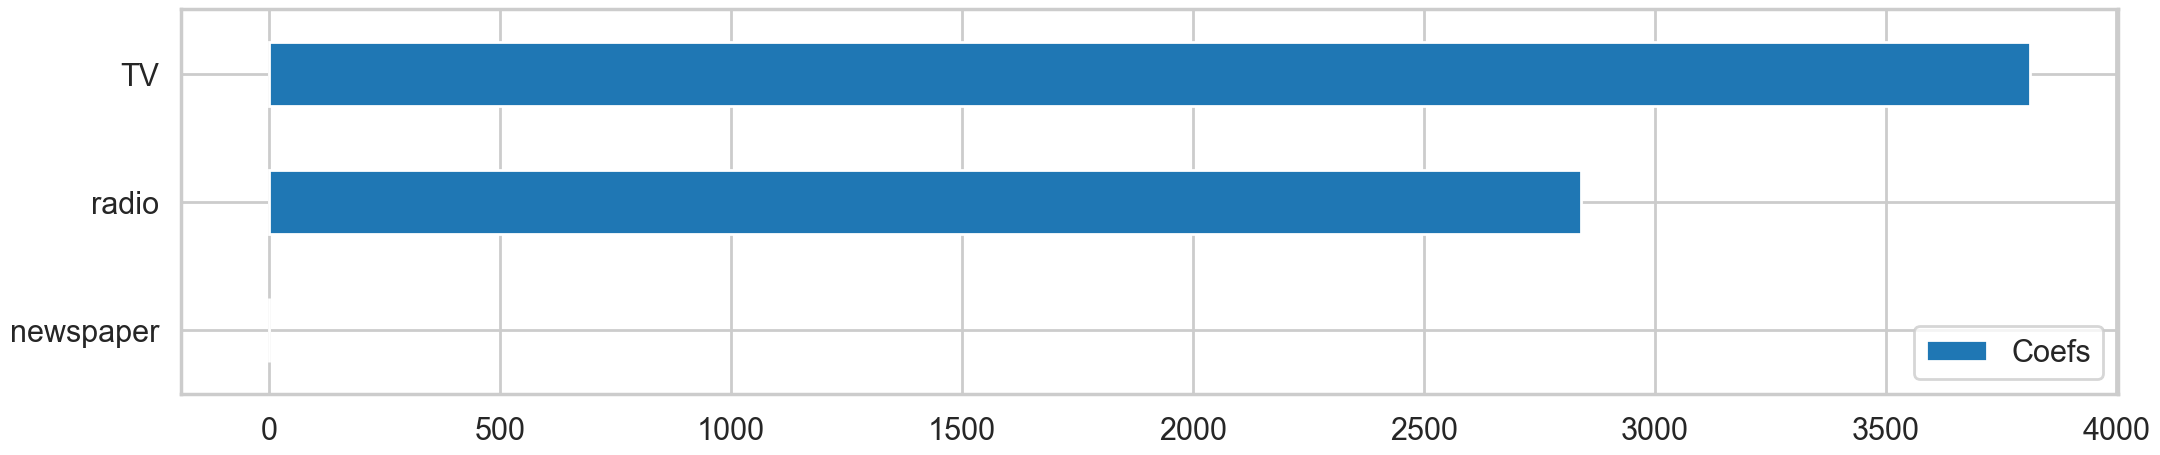

In [101]:
df_res.sort_values(by='Coefs').plot(kind='barh', figsize=(25, 5));

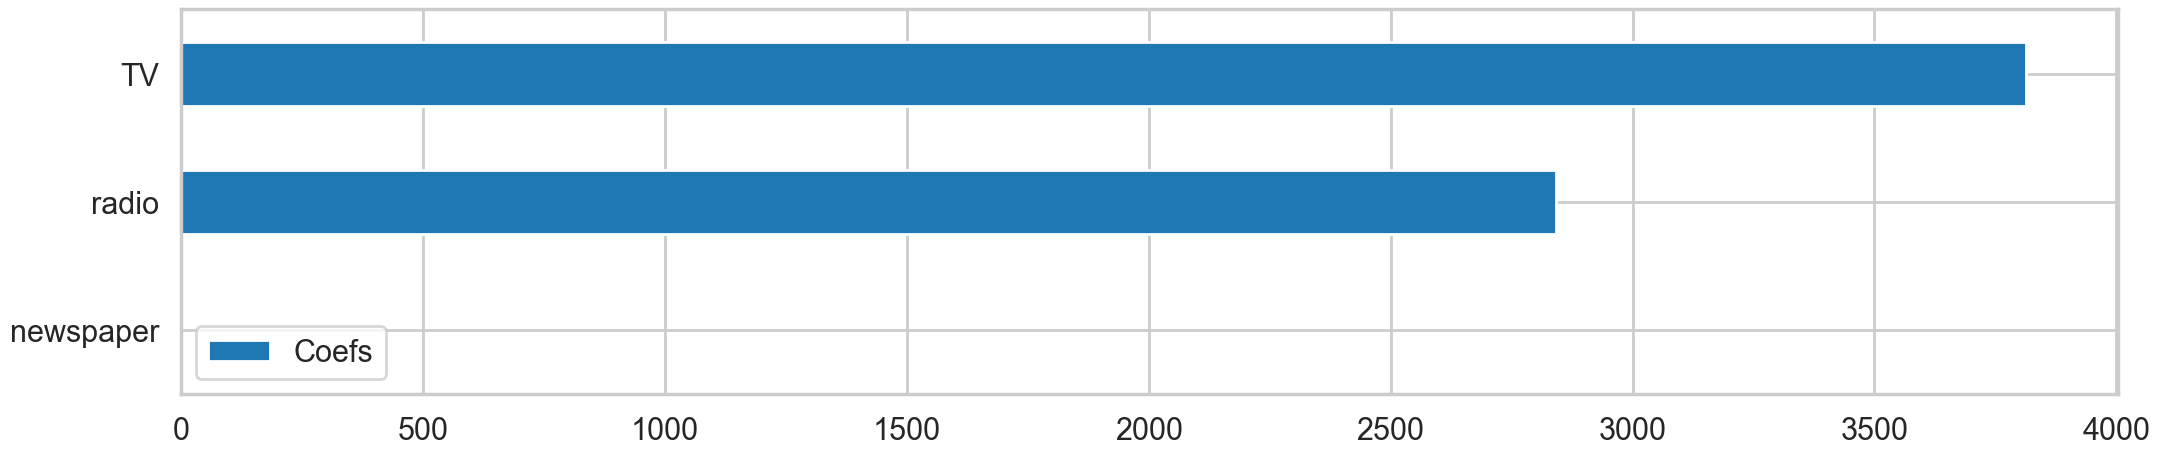

In [102]:
df_res.abs().sort_values(by='Coefs').plot(kind='barh', figsize=(25, 5));

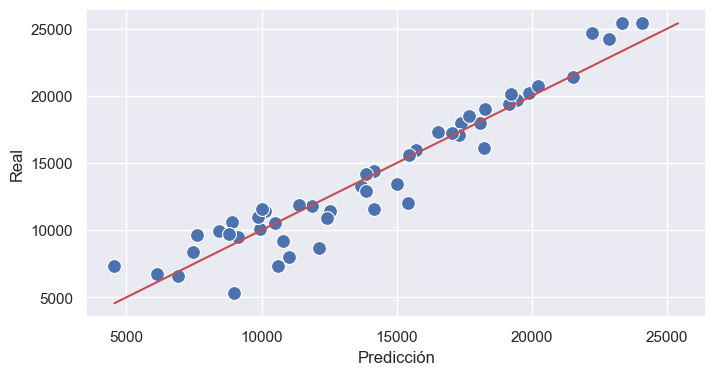

In [118]:
x = np.linspace(min(np.min(lreg_y_pred), np.min(y_test)), max(np.max(lreg_y_pred), np.max(y_test)), 100)

sns.set(rc={'figure.figsize':(8,4)})
sns.lineplot(x=x, y=x, color='r')
sns.scatterplot(x=lreg_y_pred, y=y_test, color='b', marker='o', s=100)
plt.xlabel('Predicción')
plt.ylabel('Real');

## Ridge regression

In [119]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha=1.)

sc = StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

ridgeR.fit(x_train_sc, y_train)
y_pred = ridgeR.predict(x_test_sc)

In [120]:
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge)

2405879.678888997


In [142]:
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Estimación del coeficiente'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

     Columns  Estimación del coeficiente
0         TV                 2316.172394
1      radio                 1678.557044
2  newspaper                  328.545812


In [122]:
print("Coeficientes:", ridgeR.coef_)
print("Interceptor:", ridgeR.intercept_)

Coeficientes: [3788.80094235 2820.18985875    9.29387708]
Interceptor: 14008.666666666668


### Gráfica para alpha = 1

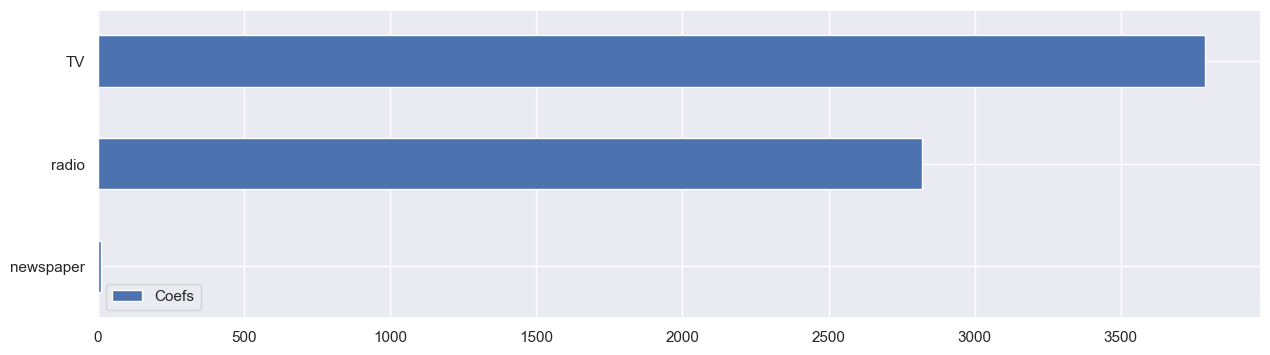

In [137]:
def plot_params(model, columns):
    df_res = pd.DataFrame(model.coef_, index=columns, columns=['Coefs'])
    df_res.sort_values(by='Coefs').plot(kind='barh', figsize=(15, 4))

plot_params(ridgeR, X_train.columns)

### Gráfica para alpha = 100

MODELO DE ENTRENAMIENTO

In [138]:
ridgeR = Ridge(alpha=100.)

sc = StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

ridgeR.fit(x_train_sc, y_train)
y_pred = ridgeR.predict(x_test_sc)

ERROR MEDIO AL CUADRADO

In [139]:
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

6771935.027143779


MAE:

In [140]:
mean_absolute_error_ridge = np.mean(np.abs(y_pred - y_test)) 
print('MAE:', mean_absolute_error_ridge)

MAE: 2050.9702173632845


COEFICIENTE DE RIDGE 

In [143]:
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Estimación del coeficiente'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient)

     Columns  Estimación del coeficiente
0         TV                 2316.172394
1      radio                 1678.557044
2  newspaper                  328.545812


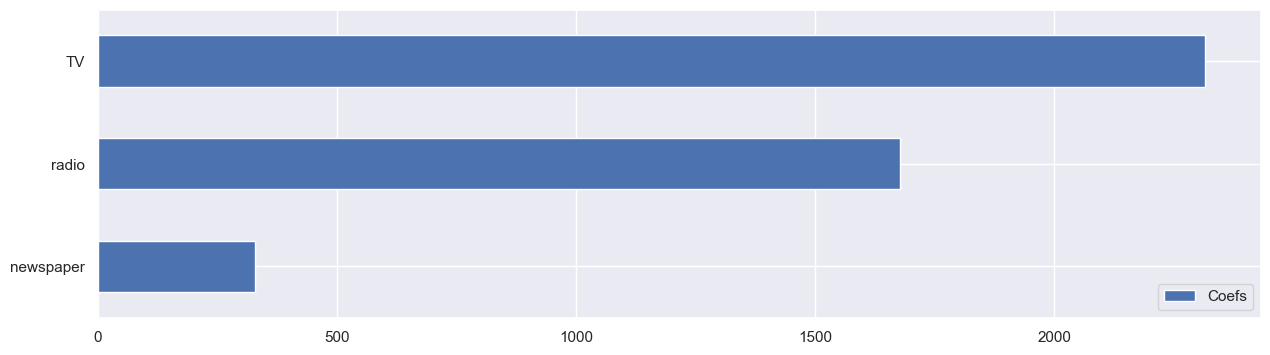

In [144]:
plot_params(ridgeR, X_train.columns)

In [146]:
np.mean(y)

14022.5

In [147]:
np.std(y)

5204.396578855228

### Lasso regression

In [148]:
from sklearn.linear_model import Lasso

ENTRENANDO AL MODELO CON ALPHA = 0.1

In [164]:
lasso = Lasso(alpha=0.1)

sc = StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

lasso.fit(x_train_sc, y_train)
y_pred1 = lasso.predict(x_test_sc)

ERROR MEDIO AL CUADRADO Y MAE

In [165]:
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("ERROR AL CUADRADO MEDIO DEL CONJUNTO DE PRUEBA", mean_squared_error) 
mean_absolute_error= np.mean(np.abs(y_pred1 - y_test)) 
print('MAE:', mean_absolute_error)

ERROR AL CUADRADO MEDIO DEL CONJUNTO DE PRUEBA 2393641.0826866287
MAE: 1167.3240848543753


COEFICIENTE DE RIDGE 

In [166]:
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Estimación del coeficiente'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

     Columns  Estimación del coeficiente
0         TV                 3813.327400
1      radio                 2841.283814
2  newspaper                   -0.327652


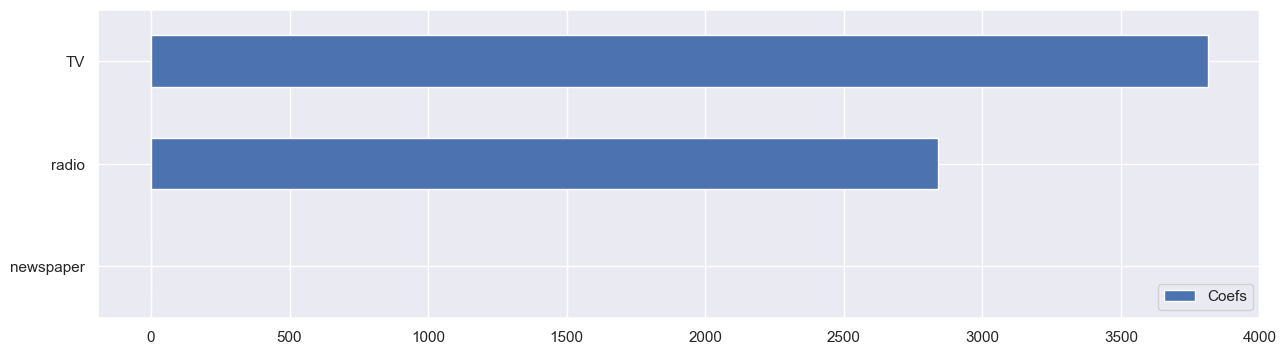

In [167]:
plot_params(lasso, X_train.columns)

ENTRENANDO AL MODELO CON ALPHA = 1.0

In [155]:
from sklearn.linear_model import Lasso

In [160]:
lasso = Lasso(alpha=1)

sc = StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

lasso.fit(x_train_sc, y_train)
y_pred1 = lasso.predict(x_test_sc)

ERROR MEDIO AL CUADRADO Y MAE

In [161]:
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("ERROR AL CUADRADO MEDIO DEL CONJUNTO DE PRUEBA", mean_squared_error) 
mean_absolute_error= np.mean(np.abs(y_pred1 - y_test)) 
print('MAE:', mean_absolute_error)

ERROR AL CUADRADO MEDIO DEL CONJUNTO DE PRUEBA 2393933.143381492
MAE: 1167.4285187947003


COEFICIENTE DE RIDGE 

In [162]:
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Estimación del coeficiente'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

     Columns  Estimación del coeficiente
0         TV                 3812.465638
1      radio                 2840.296586
2  newspaper                    0.000000


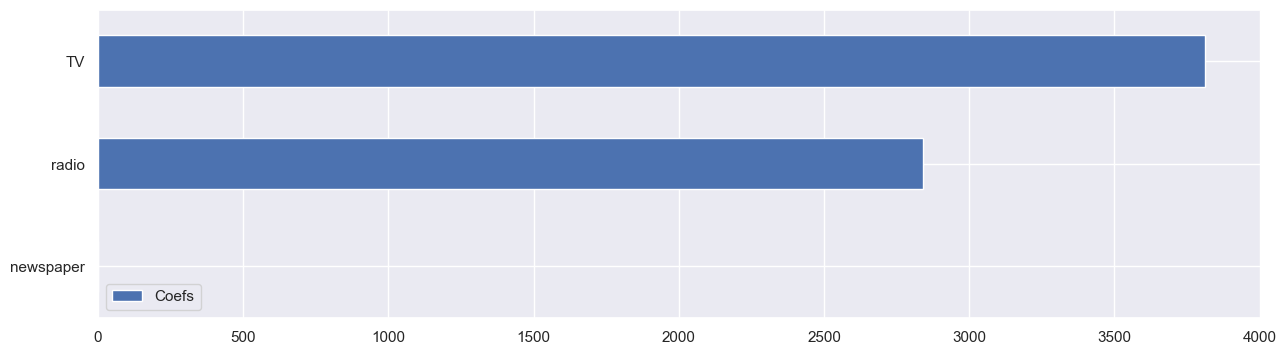

In [163]:
plot_params(lasso, X_train.columns)

### Elastic Net

In [168]:
from sklearn.linear_model import ElasticNet

MODELO DE ENTRENAMIENTO

In [169]:
elastic = ElasticNet(alpha=1., l1_ratio=0.1)

sc = StandardScaler()
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

elastic.fit(x_train_sc, y_train)
y_pred1 = elastic.predict(x_test_sc)

ERROR MEDIO AL CUADRADO Y MAE

In [170]:
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("ERROR AL CUADRADO MEDIO DEL CONJUNTO DE PRUEBA", mean_squared_error) 
mean_absolute_error= np.mean(np.abs(y_pred1 - y_test)) 
print('MAE:', mean_absolute_error)

ERROR AL CUADRADO MEDIO DEL CONJUNTO DE PRUEBA 8360264.531914933
MAE: 2330.597720179902


COEFICIENTE DE RIDGE 

In [171]:
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Estimación del coeficiente'] = pd.Series(lasso.coef_) 
  
print(lasso_coeff) 

     Columns  Estimación del coeficiente
0         TV                 3813.327400
1      radio                 2841.283814
2  newspaper                   -0.327652


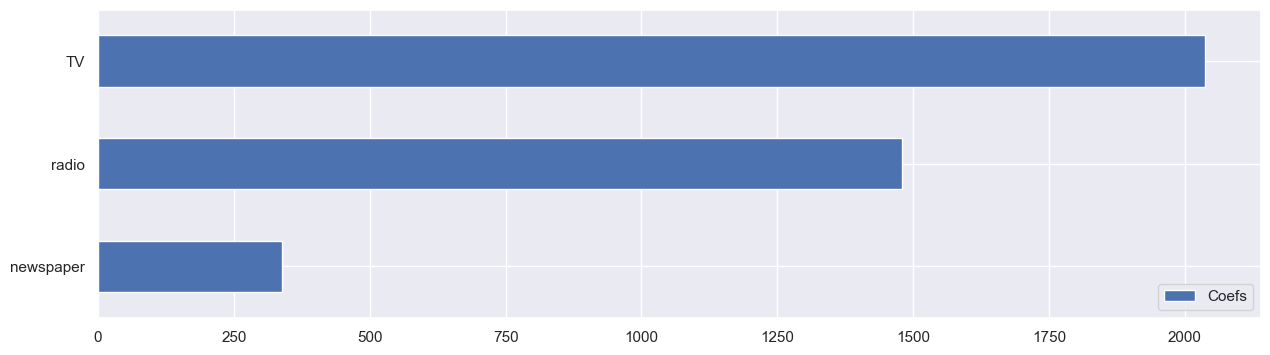

In [172]:
plot_params(elastic, X_train.columns)

### Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

#### CONCLUSIÓN:

Las 2 principales variables predictoras son TV y Radio, la combinación de estas variables hace un mejor modelo.

Con los resultados obtenidos podemos resolver que la publicidad en TV y Radio es la que más contribuye a las Ventas, y la pblicidad en Periódicos tienen poco efecto en las Ventas, y en algunos casos practicamente ninguno. Aún aumentando la inversión en publicidad en los Periódicos, la Radio y la TV siguen siendo las opciones más efectivas para contribuir a un aumento en las Ventas. 
